In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [7]:
df = pd.read_csv("C:/Users/arzum/OneDrive/Belgeler/GitHub/Ada-Lovelace-Academy/exercises/data/FuelConsumption/FuelConsumption.csv")
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [8]:
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


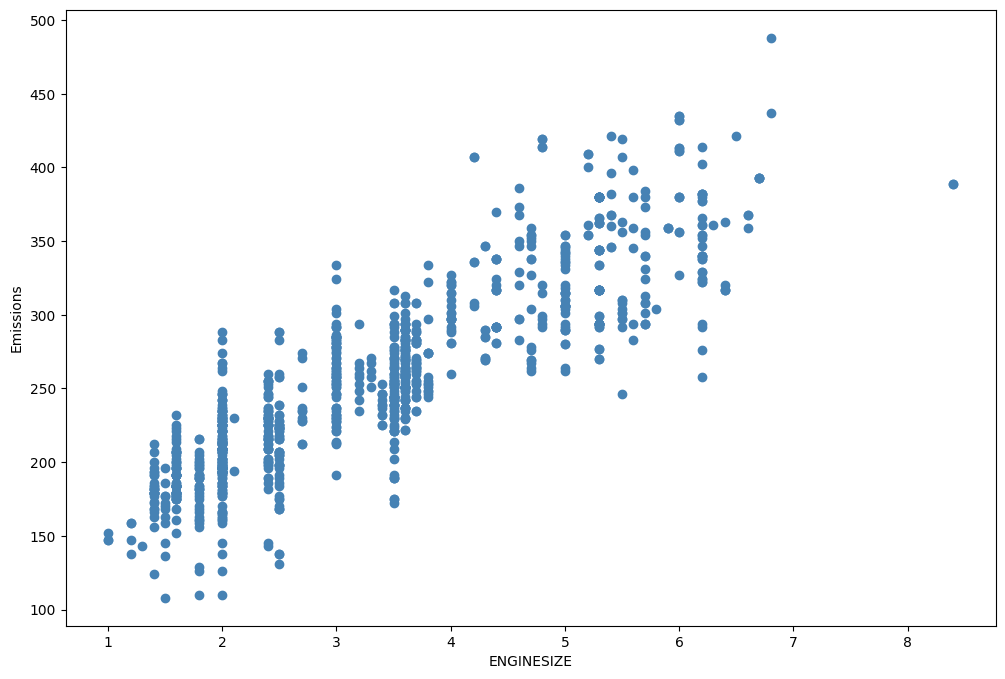

In [9]:
plt.rcParams['figure.figsize'] = (12,8)

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="steelblue")
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

- In polynomial regression, the relationship between the independent variable x and the dependent variable y is modeled as nth degree polynomial in x.
2nd degree:
y = θ0 + θ1 x + θ2 x^2

For example, the original feature set has only one feature: ENGINESIZE
If we select the degree of the polynomial to be 2:
It generates 3 features: degree=0, degree=1, degree=2

In [11]:
from sklearn.preprocessing import PolynomialFeatures

train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])

test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])

poly = PolynomialFeatures(degree=2)

In [12]:
train_x_poly = poly.fit_transform(train_x)

print(train_x_poly)

[[ 1.    3.    9.  ]
 [ 1.    3.7  13.69]
 [ 1.    3.6  12.96]
 ...
 [ 1.    2.    4.  ]
 [ 1.    6.   36.  ]
 [ 1.    3.    9.  ]]


- Transformed data looks like feature sets of multiple linear regression analysis.
2nd degree quation would be turn into:
y = θ0 + θ1 x1 + θ2 x2

- Polynomial regression is a special case of linear regression, with selection your features.

In [13]:
from sklearn import linear_model

clf = linear_model.LinearRegression()

In [14]:
train_y_ = clf.fit(train_x_poly, train_y)

# The coefficients
print("Coefficients:", clf.coef_)
print("Intercept:", clf.intercept_)

Coefficients: [[ 0.         51.61978503 -1.78200285]]
Intercept: [107.70799636]


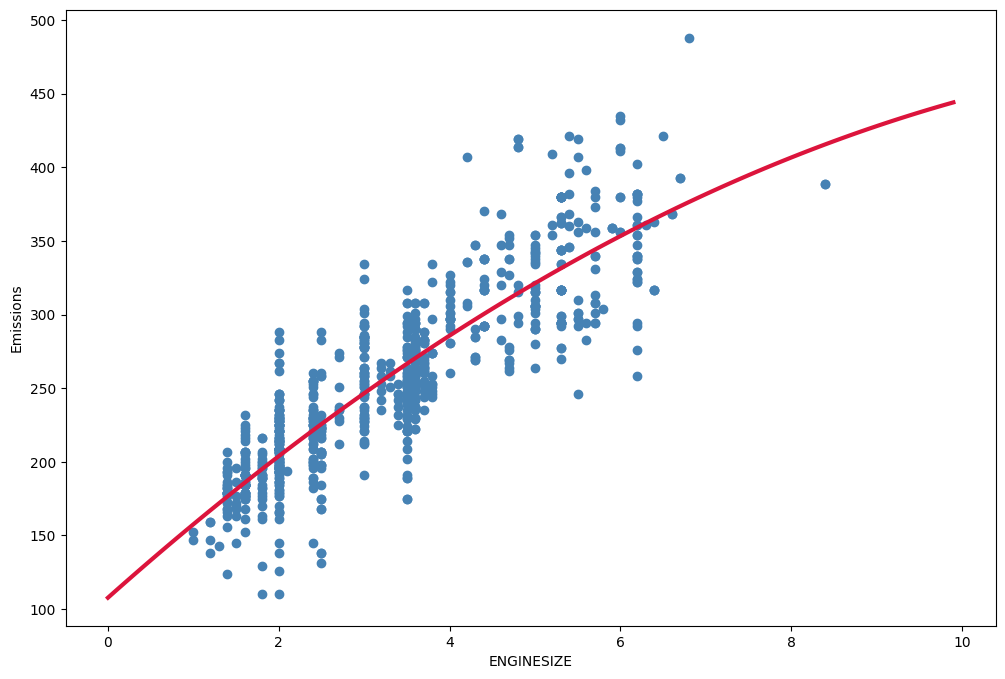

In [15]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="steelblue")
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1] * XX + clf.coef_[0][2] * np.power(XX, 2)
plt.plot(XX, yy, "crimson", linewidth=3)
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

# Evaluation

In [17]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [18]:
test_x_poly = poly.transform(test_x)
test_y_ = clf.predict(test_x_poly)

print(f"R2 Score : {r2_score(test_y, test_y_)}")
print(f"MEan Absolute Error (MAE) : {np.mean(np.absolute(test_y_ - test_y )):.2f}")
print(f"Mean Square Error (MSE) : {np.mean((test_y_ - test_y) ** 2): .2f}")

R2 Score : 0.7713497486826667
MEan Absolute Error (MAE) : 25.16
Mean Square Error (MSE) :  1028.95


## Practive
Try to use a polynomial regression with the dataset but this time with degree three (cubic). Does it result in better accuracy?

In [19]:
train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])

test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])

poly = PolynomialFeatures(degree=3)

In [20]:
train_x_poly = poly.fit_transform(train_x)

clf = linear_model.LinearRegression()

train_y_ = clf.fit(train_x_poly, train_y)

# the coefficients
print("Coefficient:", clf.coef_)
print("Intercept: ", clf.intercept_)

Coefficient: [[ 0.         32.93551715  3.34816683 -0.42372933]]
Intercept:  [127.58153194]


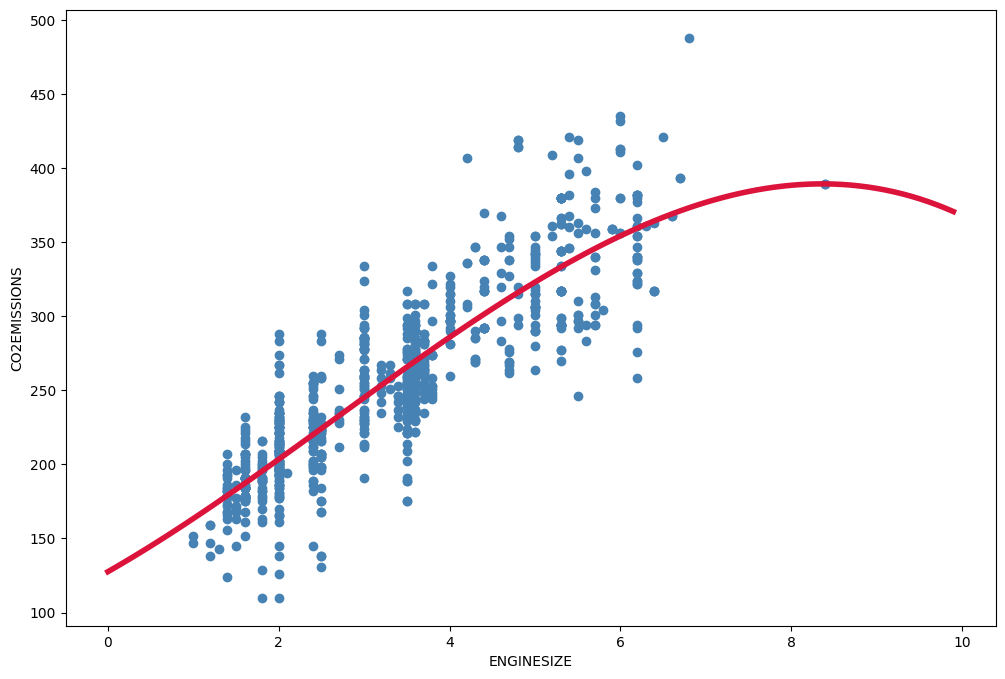

In [21]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="steelblue")
xx= np.arange(0.0, 10.0, 0.1)
yy= clf.intercept_[0] + clf.coef_[0][1] * xx + clf.coef_[0][2]* np.power(xx,2) + clf.coef_[0][3]* np.power(xx,3)
plt.plot(xx, yy, "crimson", linewidth = 4)
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()